In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# Import dataset for our enviroment

df = pd.read_csv("/content/drive/MyDrive/dataset1/rolling_stones_spotify.csv")

In [4]:
df

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [5]:
df.rename(columns={"Unnamed: 0" : "Master_id"}, inplace=True  )

In [6]:
df

,Master_id,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [7]:
df.shape

(1610, 18)

In [8]:
df.dtypes

Master_id             int64
name                 object
album                object
release_date         object
track_number          int64
id                   object
uri                  object
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
dtype: object

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

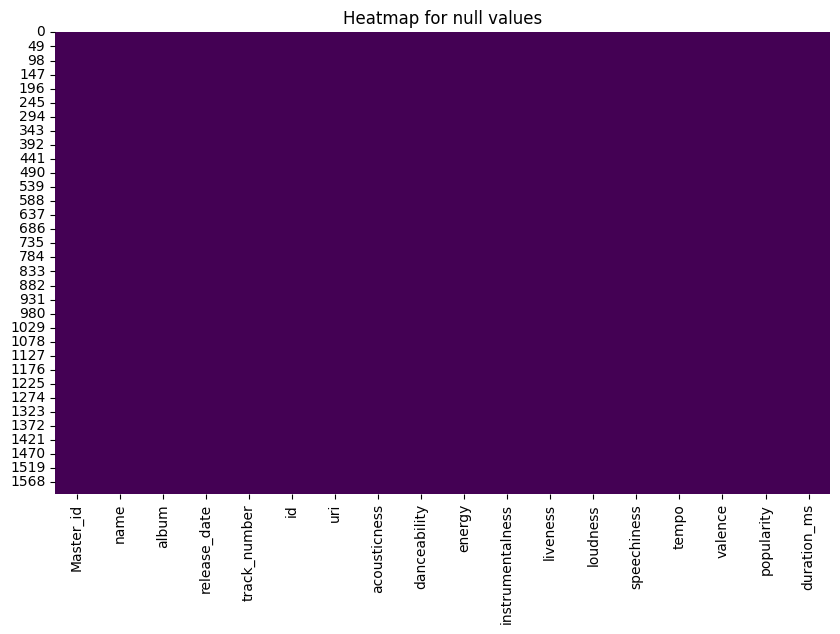

In [10]:
# Data cleaning


# Null values
df_null = df.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(df_null, cbar=False,cmap='viridis')

plt.title("Heatmap for null values")

plt.show()

In [11]:
print(df_null.sum())

Master_id           0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


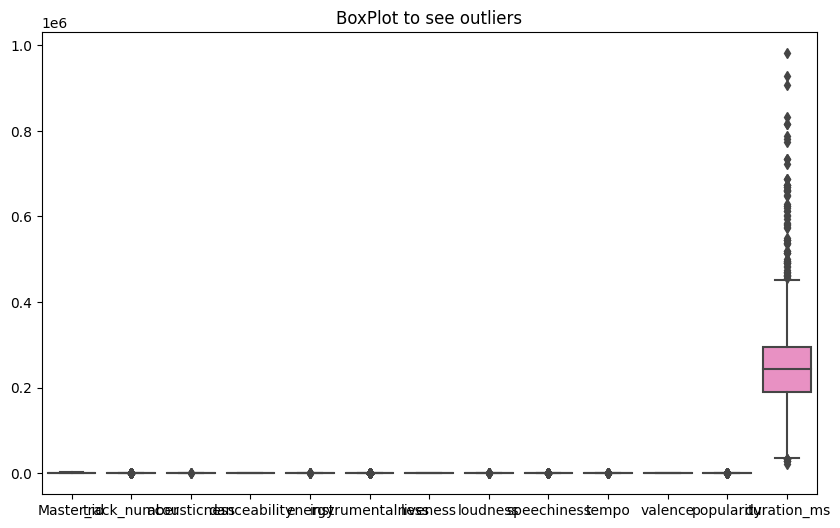

In [12]:
# outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("BoxPlot to see outliers")
plt.show()

In [24]:
df['release_Year'] = df['release_date'].dt.year
df

,Master_id,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_Year
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640,2022,2022
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173,2022,2022
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160,2022,2022
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880,2022,2022
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106,2022,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080,1964,1964
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266,1964,1964
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080,1964,1964
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680,1964,1964


In [25]:
# because we have a big diference betewen values lats make more detalied


#separate dataset
low_float_columns = ['acousticness','danceability','instrumentalness','liveness','speechiness','valence']
high_int_float = ['tempo','popularity']
others_columns = ['loudness','duration_ms']
last_columns = ['Master_id','release_Year']

df_low = df[low_float_columns]
df_high = df[high_int_float]
df_others = df[others_columns]
df_last = df[last_columns]

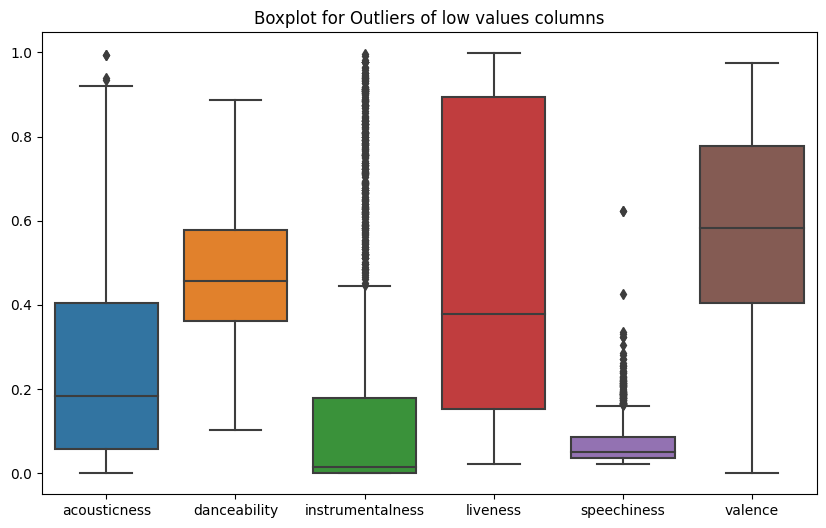

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_low)
plt.title("Boxplot for Outliers of low values columns")
plt.show()

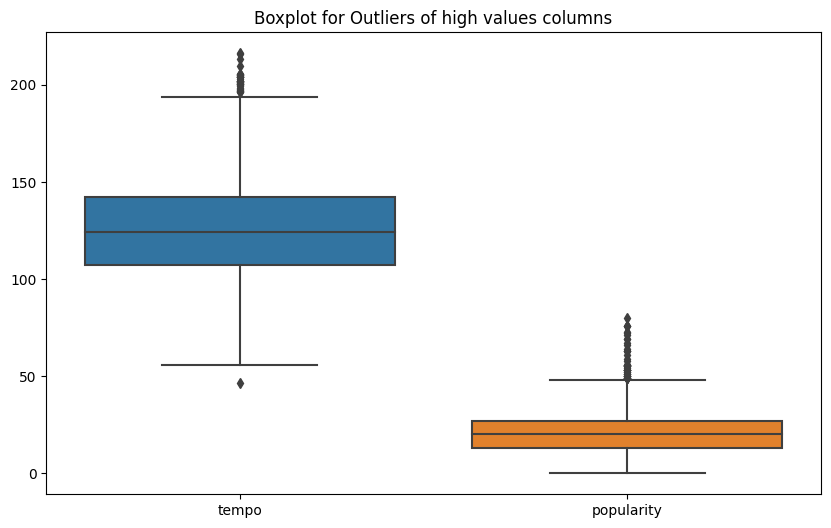

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_high)
plt.title("Boxplot for Outliers of high values columns")
plt.show()


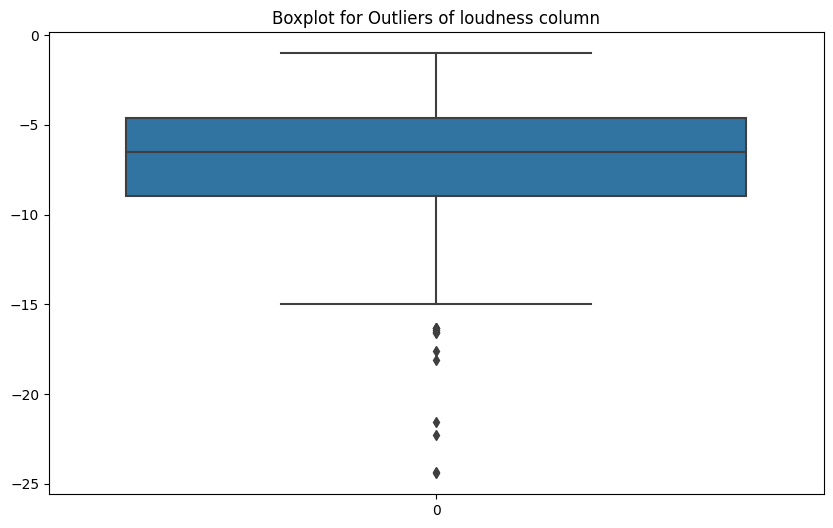

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['loudness'])
plt.title('Boxplot for Outliers of loudness column')
plt.show()

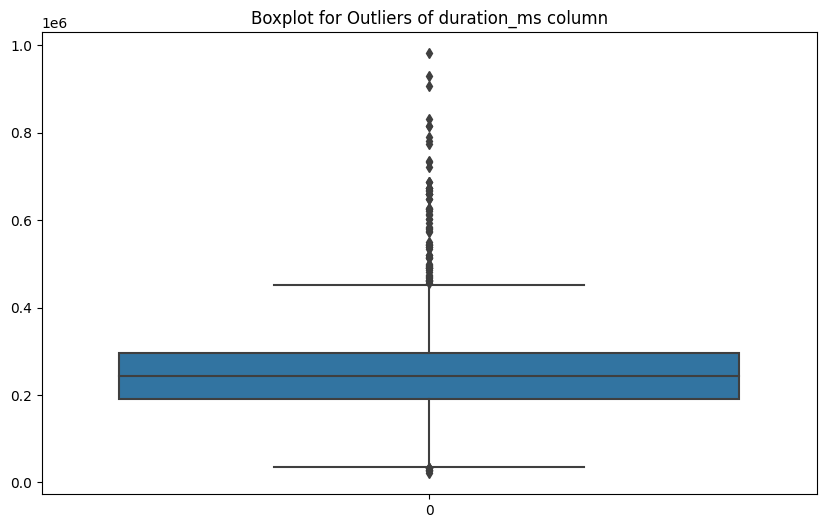

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df['duration_ms'])
plt.title('Boxplot for Outliers of duration_ms column')
plt.show()

In [30]:
df_numeric = pd.concat([df_low,df_high,df_others,df_last], axis=1)

In [31]:
df_numeric.describe()

,acousticness,danceability,instrumentalness,liveness,speechiness,valence,tempo,popularity,loudness,duration_ms,Master_id,release_Year
count,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,0.250475,0.468860,0.164170,0.49173,0.069512,0.582165,126.082033,20.788199,-6.971615,257736.488199,804.500000,1991.745963
std,0.227397,0.141775,0.276249,0.34910,0.051631,0.231253,29.233483,12.426859,2.994003,108333.474920,464.911282,22.440296
min,0.000009,0.104000,0.000000,0.02190,0.023200,0.000000,46.525000,0.000000,-24.408000,21000.000000,0.000000,1964.000000
25%,0.058350,0.362250,0.000219,0.15300,0.036500,0.404250,107.390750,13.000000,-8.982500,190613.000000,402.250000,1970.000000
50%,0.183000,0.458000,0.013750,0.37950,0.051200,0.583000,124.404500,20.000000,-6.523000,243093.000000,804.500000,1986.000000
75%,0.403750,0.578000,0.179000,0.89375,0.086600,0.778000,142.355750,27.000000,-4.608750,295319.750000,1206.750000,2017.000000
max,0.994000,0.887000,0.996000,0.99800,0.624000,0.974000,216.304000,80.000000,-1.014000,981866.000000,1609.000000,2022.000000


In [32]:
# verify duplicates in dataset

duplicatas = df.duplicated().any()

if duplicatas:
    print("There are duplicates in the DataFrame.")
else:
    print("There are no duplicates in the DataFrame.")

There are no duplicates in the DataFrame.


In [33]:
# data analysis


o	Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.

what would it be like an album that everyone should like the average would be great ,maybe there are no extraordinary songs among them but in general all the songs should be good.

In [34]:
count_popularity = df.groupby('album')['popularity'].sum().reset_index()

In [35]:
top_5_album = count_popularity.sort_values(by='popularity',ascending=False).head(5)

In [36]:
print(top_5_album['album'])

40                            Honk (Deluxe)
75                Tattoo You (Super Deluxe)
36                 Goats Head Soup (Deluxe)
62              Some Girls (Deluxe Version)
28    Exile On Main Street (Deluxe Version)
Name: album, dtype: object


 ## 1.Honk (Deluxe)
 ## 2.Tattoo You (Super Deluxe)               
 ## 3.Goats Head Soup (Deluxe)               
 ## 4.Some Girls (Deluxe Version)
 ## 5.Exile On Main Street (Deluxe Version)             
   

#	Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.

In [37]:
# Let's start by looking at the relationship between numerical variables

correlation_matrix = df_numeric.corr()

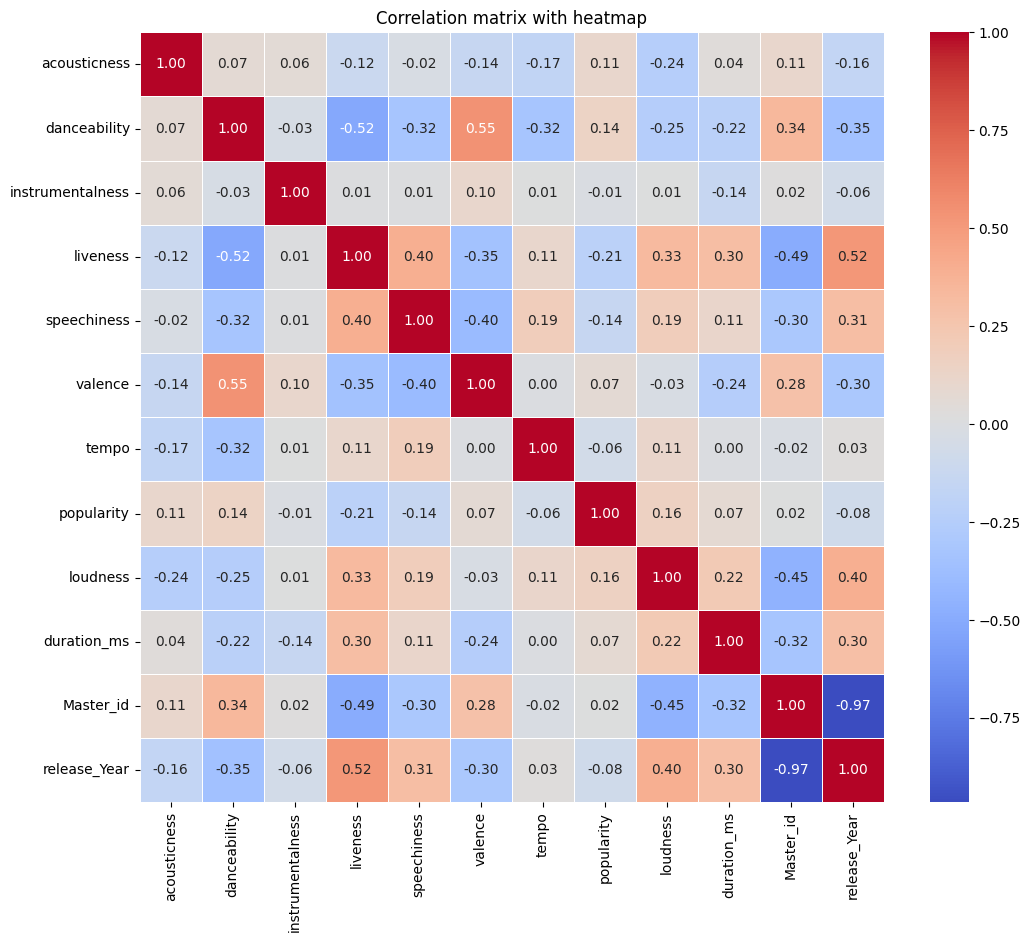

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt=".2f")
plt.title('Correlation matrix with heatmap')
plt.show()

In this correlation matrix, unfortunately, I can't see much of what can make a song more or less popular.

but we have a correlation regarding valance and danceability, which was already expected, happiest songs are the most danceable.

* valance-danceability
* speechiness-liveness

#	Discover how a song's popularity relates to various factors and how this has changed over time.

In [39]:
# correlation of all variables with the year of release


Year_corr = df_numeric.corr()['release_Year'].values
print(Year_corr)

[-0.16119325 -0.353826   -0.06296395  0.51830649  0.30688814 -0.30066067
  0.0308757  -0.08164804  0.39927011  0.30006646 -0.96539861  1.        ]


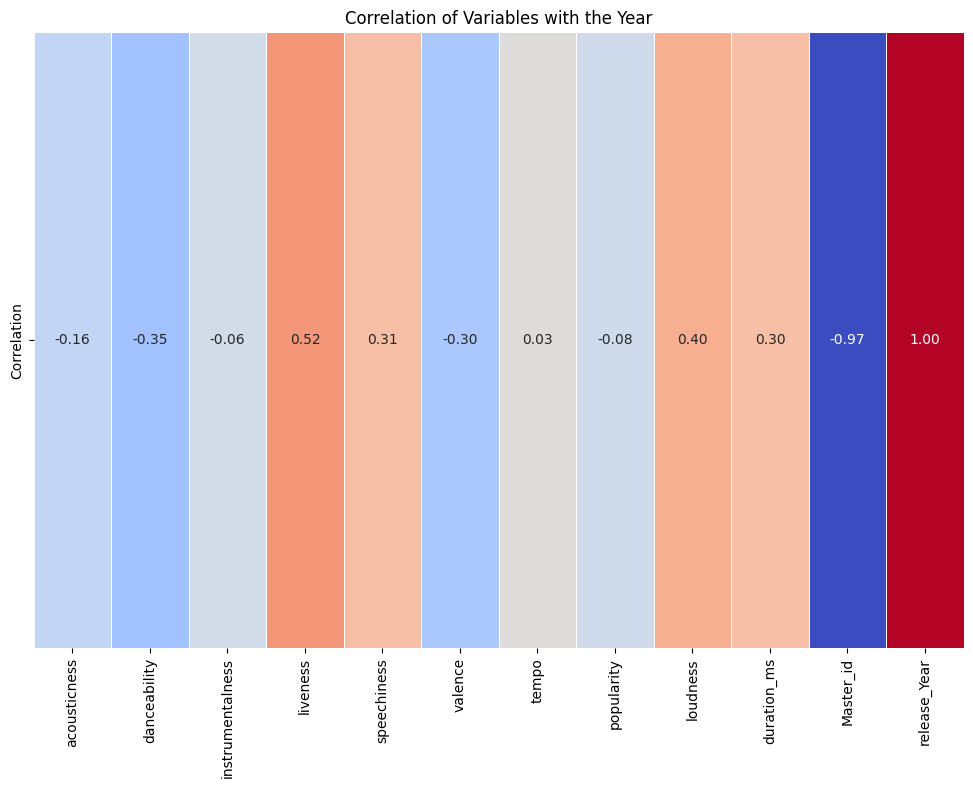

In [40]:
# heatmap for correlation of all numeric varibles with release_Year

Year_corr_df = pd.DataFrame(Year_corr, index=df_numeric.columns, columns=['Correlation'])


plt.figure(figsize=(12, 8))
sns.heatmap(data=Year_corr_df.T, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=False)
plt.title('Correlation of Variables with the Year')
plt.show()

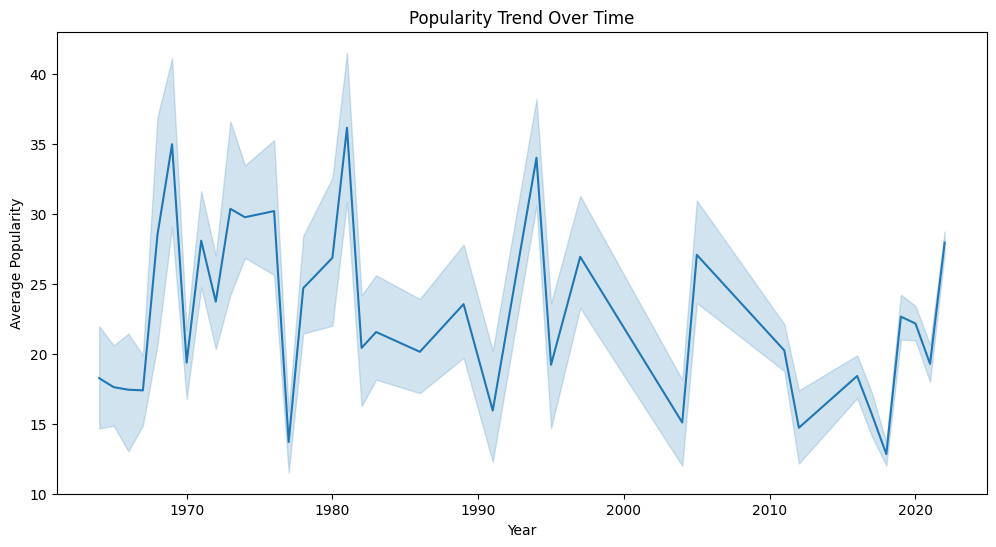

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_Year', y='popularity')
plt.title('Popularity Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()

In [42]:
mean_music_popularity_per_year = df.groupby(df['release_Year'])['popularity'].mean().nlargest(5)

In [43]:
print(mean_music_popularity_per_year)

release_Year
1981    36.136364
1969    34.962963
1994    34.000000
1973    30.350000
1976    30.187500
Name: popularity, dtype: float64


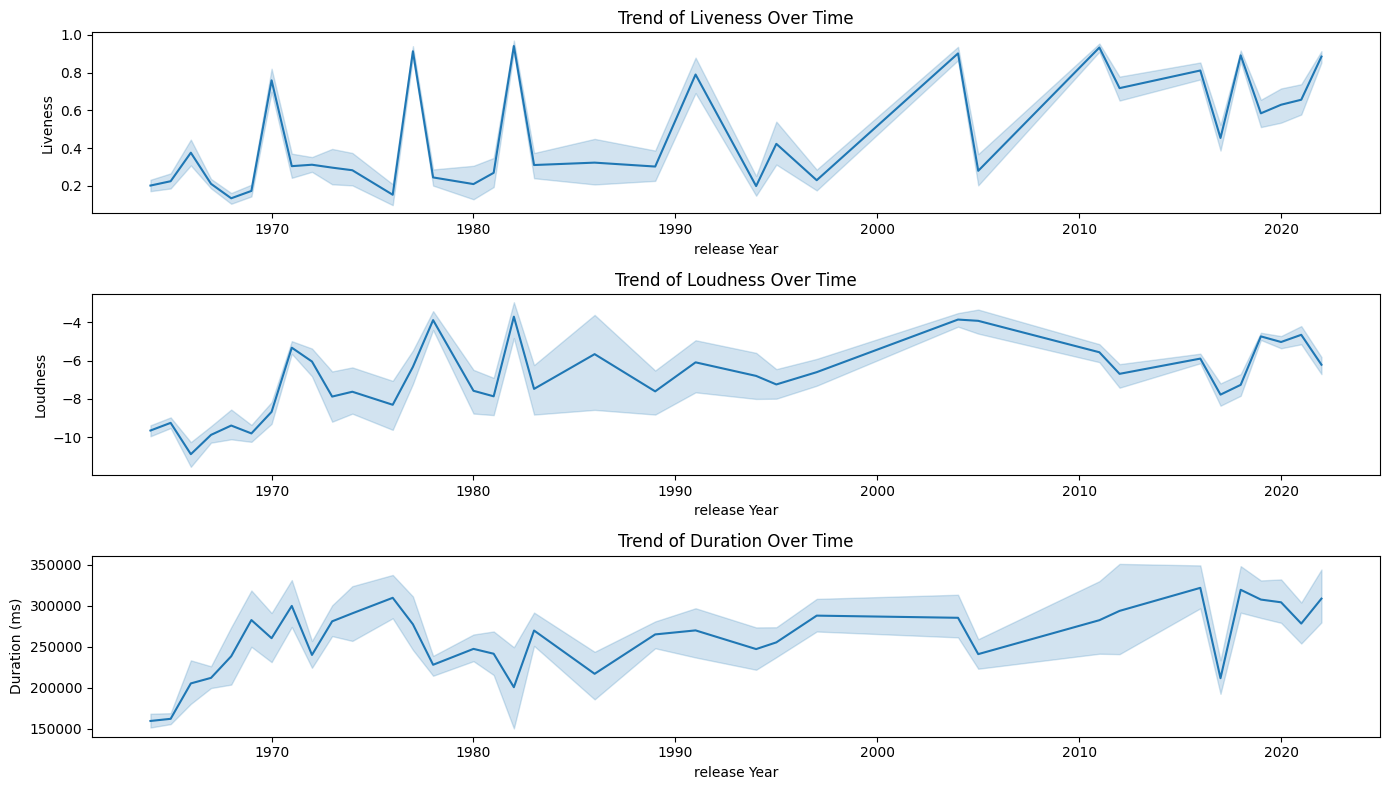

In [44]:
plt.figure(figsize=(14, 8))

# Liveness over time
plt.subplot(3, 1, 1)
sns.lineplot(data=df_numeric, x='release_Year', y='liveness')
plt.title('Trend of Liveness Over Time')
plt.xlabel('release Year')
plt.ylabel('Liveness')

# Loudness over time
plt.subplot(3, 1, 2)
sns.lineplot(data=df_numeric, x='release_Year', y='loudness')
plt.title('Trend of Loudness Over Time')
plt.xlabel('release Year')
plt.ylabel('Loudness')

# Duration over time
plt.subplot(3, 1, 3)
sns.lineplot(data=df_numeric, x='release_Year', y='duration_ms')
plt.title('Trend of Duration Over Time')
plt.xlabel('release Year')
plt.ylabel('Duration (ms)')

plt.tight_layout()
plt.show()

From my studies, I concluded that perhaps music is no longer at its peak but more balanced as it was in the 70s to 90s. I believe that with the advancement of other technologies, people can spend their time doing other things like watching streams or playing games, etc.


 Also how we can see over time the 'liveness', 'loudness' and 'duration_ms' which indicates the entry perhaps of podcasts.

#	Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.


Dimensionality reduction is crucial for dealing with the "curse of dimensionality", making data analysis more efficient and preventing overfitting. These techniques simplify models, improve interpretability, and make complex patterns easier to visualize. By focusing on the most relevant features, they contribute to modeling effectiveness, reduce noise in data, and are essential for high-dimensional datasets.


It is obvious that with the increase in technology also comes some problems with it, such as the exponential increase in data, but these problems can be solved with professionals like us who are prepared to process the data as much as possible, to the point of leaving you with only data that really matters to be studied and analyzed and of course with the increase in data also comes a good thing that is the increase in precision in decision making and thus being able to use this data to train machines to operate on gigantic data which would perhaps take a human a few hours to do. can now be done in minutes perhaps seconds and help us make accurate decisions

# Perform Cluster Analysis:

*	Identify the right number of clusters

In [45]:
# List to store intra-cluster variation
inertia = []

# Test different values for the number of clusters
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_numeric)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

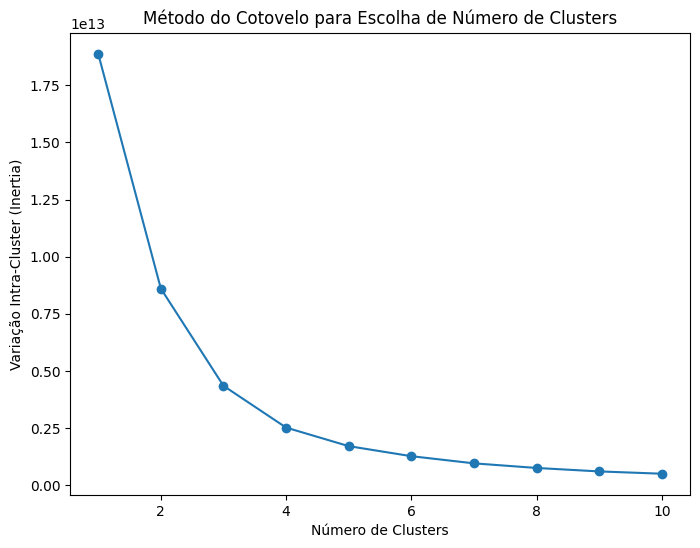

In [46]:
# Plot the elbow method graph

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Escolha de Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Variação Intra-Cluster (Inertia)')
plt.show()

Number of clusters - 3

In [48]:
n_clusters = 3

# relevant characteristics for clustering
X = df[['energy', 'danceability']]

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
print(df[['energy', 'danceability', 'cluster']])

      energy  danceability  cluster
0      0.993         0.463        0
1      0.965         0.326        0
2      0.969         0.386        0
3      0.985         0.369        0
4      0.969         0.303        0
...      ...           ...      ...
1605   0.932         0.466        0
1606   0.706         0.509        1
1607   0.774         0.790        1
1608   0.546         0.700        2
1609   0.934         0.727        1

[1610 rows x 3 columns]


for me 'danceability' and 'energy' are the most relevant characteristics for us to be able to create cluster divisions and be able to recommend similar music to the user